### Heart disease prediction - Kaggle dataset
<br><br />
#### Decision Tree and Random Forest Classification models
In this part of the project, we use the cleaned dataset and apply Decision tree based methods. We train and evaluate models and also tune a couple of hyperparameters for Random Forest model. We will be keeping track of model scores - we will be building more tree-based classifier models in the next part of the project for comparison.<br><br />

In [50]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# -- import cleaned data --
df = pd.read_csv('heart_dumm_clean.csv')
df.describe()

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,746.00000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,372.50000,52.882038,133.022788,244.635389,0.167560,140.226542,0.384718,0.901609,0.477212,0.243968,...,0.495979,0.222520,0.226542,0.054960,0.235925,0.596515,0.167560,0.057641,0.474531,0.467828
std,215.49594,9.505888,17.282750,59.153524,0.373726,24.524107,0.486855,1.072861,0.499816,0.429762,...,0.500319,0.416218,0.418874,0.228055,0.424860,0.490926,0.373726,0.233219,0.499686,0.499299
min,0.00000,28.000000,92.000000,85.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.25000,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,372.50000,54.000000,130.000000,237.000000,0.000000,140.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,558.75000,59.000000,140.000000,275.000000,0.000000,160.000000,1.000000,1.500000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,745.00000,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# -- creating input and target data for model training/testing --
dfin = df.copy().drop(['Unnamed: 0', 'HeartDisease'], axis='columns')
dfout = df.copy()['HeartDisease']

<br><br />
Unlike algorithms like neural networks, where data input scaling can affect the model training, decision trees do not require scaling of input data because, as the name suggests, they take decisions of data splitting without using data itself in complicated mathematical operations for the model.<br><br />
We will start with a simple decision tree. We keep the *max\_depth* to a reasonable minimum because decision trees are powerful classifiers that are well known to overfit data easily. Also, we use *Sex\_F* as the stratifying criterion for splitting data into train and test sets because of skewness of data in male and female numbers, making sure both data sets have equal fraction of male and female attribute data points.<br><br />

In [81]:
# -- define decision tree and train --
print('-- DECISION TREE --')
RS = 50
X_train, X_test, y_train, y_test = train_test_split(dfin, dfout, test_size=0.3, stratify=dfin['Sex_F'], 
                                          random_state=RS)

tree = DecisionTreeClassifier(max_depth = 7, min_samples_split=3, random_state=RS)
tree.fit(X_train, y_train)
print('Model Train Accuracy: ', round(tree.score(X_train, y_train),4))
print('Model Test Accuracy: ', round(tree.score(X_test, y_test),4))

y_predict_test = tree.predict(X_test)
print(' Confusion matrix: \n', metrics.confusion_matrix(y_test, y_predict_test))

crsv = cross_val_score(tree, dfin, dfout, cv = 7)
print('Cross validation mean scores: ', round(crsv.mean(),4))
print('Cross validation std dev: ', round(crsv.std(),4))

-- DECISION TREE --
Model Train Accuracy:  0.9598
Model Test Accuracy:  0.8259
 Confusion matrix: 
 [[92 24]
 [15 93]]
Cross validation mean scores:  0.8254
Cross validation std dev:  0.0789


<br><br />
This tree has decent performance, and test score shows it doesn't overfit much. Now we create a Random Forest model and use two key parameters of *n\_estimators* and *max\_depth*. The Random Forest model should do better because its ensemble nature creates a cure for the overfit problem of the decision tree.<br><br />

In [82]:
# -- define random forest model --
print('--- RANDOM FOREST MODEL ---')
rndfor = RandomForestClassifier(n_estimators=30,
                               max_depth=7,
                               bootstrap=True,
                               random_state=RS, 
                               max_features = 'sqrt',
                               n_jobs=None, verbose = 0)

rndfor.fit(X_train, y_train)
print('Model Train Accuracy: ', round(rndfor.score(X_train, y_train),4))
print('Model Test Accuracy: ', round(rndfor.score(X_test, y_test),4))

y_predict_test = rndfor.predict(X_test)
print(' Confusion matrix: \n', metrics.confusion_matrix(y_test, y_predict_test))

crsv = cross_val_score(rndfor, dfin, dfout, cv = 7)
print('Cross validation mean scores: ', round(crsv.mean(),4))
print('Cross validation std dev: ', round(crsv.std(),4))

--- RANDOM FOREST MODEL ---
Model Train Accuracy:  0.9693
Model Test Accuracy:  0.8348
 Confusion matrix: 
 [[95 21]
 [16 92]]
Cross validation mean scores:  0.867
Cross validation std dev:  0.068


<br><br />
The Random Forest model does only slightly better on test score, but the difference can be seen in the mean cross validation scores and their standard deviation. This shows that overall the Random Forest model does a better job at random data testing, which is not surprising.<br><br />

Next, we take a look at *feature importance* which tells us which input attribute (or feature) is important and by how much. <br><br />

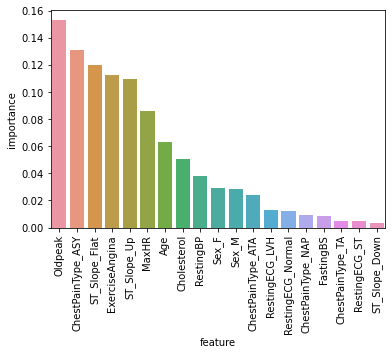

HeartDisease         1.000000
ST_Slope_Up          0.653759
ST_Slope_Flat        0.591554
ExerciseAngina       0.551834
ChestPainType_ASY    0.522982
Oldpeak              0.495696
MaxHR                0.377212
ChestPainType_ATA    0.375634
Age                  0.298617
Sex_M                0.292779
Sex_F                0.292779
ChestPainType_NAP    0.222146
RestingBP            0.173242
FastingBS            0.160594
RestingECG_Normal    0.133255
ST_Slope_Down        0.132193
Cholesterol          0.103866
RestingECG_ST        0.095921
RestingECG_LVH       0.069599
ChestPainType_TA     0.053765
Name: HeartDisease, dtype: float64

In [84]:
# -- feature importance --
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance' : rndfor.feature_importances_})
imp_df.sort_values('importance', ascending=False, inplace = True)

sns.barplot(x='feature', y='importance', data=imp_df)
plt.xticks(rotation=90)
plt.show()

df.copy().drop(['Unnamed: 0', 'HeartDisease'], axis='columns')
abs(df.drop(['Unnamed: 0'], axis='columns').corr()["HeartDisease"]).sort_values(ascending=False)

<br><br />
We can see that the most important features are those that are also the ones that have highest correlation (positive or negative) with the target attribute *HeartDisease*. But the exact order of significance is not strictly the same and will depend on what model algorithm and cost function is used.<br><br />

Now we try and tune two hyperparameters for the Random Forest model, to get a good version of our model.<br><br />


In [85]:
# -- tuning random forest model --
parameters = {'max_depth':[5,6,7,8,9,10], 'n_estimators':[10,30,50,70,90,110]}
clf = GridSearchCV(rndfor, parameters)
clf.fit(dfin, dfout)
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 90}


In [86]:
# -- define random forest model (tuned) --
print('--- RANDOM FOREST MODEL (TUNED) ---')
rndfor = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'],
                               max_depth=clf.best_params_['max_depth'],
                               bootstrap=True,
                               random_state=RS, 
                               max_features = 'sqrt',
                               n_jobs=None, verbose = 0)

rndfor.fit(X_train, y_train)
print('Model Train Accuracy: ', round(rndfor.score(X_train, y_train),4))
print('Model Test Accuracy: ', round(rndfor.score(X_test, y_test),4))

y_predict_test = rndfor.predict(X_test)
print(' Confusion matrix: \n', metrics.confusion_matrix(y_test, y_predict_test))

crsv = cross_val_score(rndfor, dfin, dfout, cv = 7)
print('Cross validation mean scores: ', round(crsv.mean(),4))
print('Cross validation std dev: ', round(crsv.std(),4))

--- RANDOM FOREST MODEL (TUNED) ---
Model Train Accuracy:  0.9444
Model Test Accuracy:  0.8571
 Confusion matrix: 
 [[96 20]
 [12 96]]
Cross validation mean scores:  0.8683
Cross validation std dev:  0.0653


<br><br />
The model has improved slightly, and this is good enough for our analysis right now. We will be trying to buid better models in the next part. The current stats for model performance are:<br><br />

| Model | Train score | Test score | CV score | CV std |
| --- | --- | --- | --- | --- |
| **Decision Tree** | 96 % | 82.6 % | 82.5 % | 7.9 % |
| **Random Forest (tuned)** | 94.4 % | 85.7 % | 86.8 % | 6.5 % |
